# Detecting the machine Failure

## About the Dataset
Since real predictive maintenance datasets are generally difficult to obtain and publish, this dataset provides a **synthetic dataset** that reflects real-world predictive maintenance scenarios encountered in industry.  

The dataset consists of **10,000 rows (data points)** and **14 features (columns)**, including product information, environmental conditions, operational data, and target failure labels.  

---

## Dataset Details
- **Rows (records):** 10,000  
- **Columns (features):** 14  
- **Targets:**  
  - **Target 1:** `Failure (0/1)` → Whether a machine failed at this point.  
  - **Target 2:** `Failure Type` → Category of failure (if any).  

Important: There are **two targets**. Do **not** mistakenly use one target as a feature, as this will cause **data leakage**.

---

## Data Dictionary

| Column Name             | Description                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------|
| `UID`                   | Unique identifier ranging from 1 to 10,000.                                                           |
| `productID`             | Product quality variant: **L (Low, 50%)**, **M (Medium, 30%)**, **H (High, 20%)** + serial number.    |
| `air temperature [K]`   | Generated via random walk, normalized to **σ = 2 K** around 300 K.                                    |
| `process temperature [K]` | Generated via random walk with **σ = 1 K**, added to air temperature + 10 K.                         |
| `rotational speed [rpm]` | Derived from power of **2860 W**, with normally distributed noise added.                              |
| `torque [Nm]`           | Normally distributed around **40 Nm (σ = 10 Nm)**, with no negative values.                           |
| `tool wear [min]`       | Tool wear time. Quality variants add wear: **H = +5 min**, **M = +3 min**, **L = +2 min**.            |
| `machine failure`       | **Binary label (0/1):** Indicates if machine failed at this data point.                               |
| `failure type`          | Specific type of failure if a machine failed.                                                         |

---

## Targets
- **`Failure (0/1)`**: Did the machine fail?  
- **`Failure Type`**: What type of failure occurred (if any).  

---

## Acknowledgements
- Dataset Source: [UCI Machine Learning Repository – AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)  


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly as plty

In [19]:
data=pd.read_csv(r"C:\Users\HP\Desktop\predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


**Inferences :**
- `UDI` is an unique column and is not useful in the analytical and modelling process so dropping it.
- Data in `tool_wear [min]` ranges from 0 to 253 indicating that there are some unused tool with the tolls that are used for longer perioed.

In [21]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [22]:
data.drop(columns='UDI',inplace=True)
data.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [23]:
data['Target'].dtype

dtype('int64')

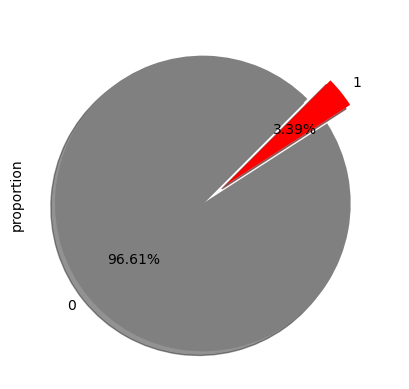

In [24]:
(data['Target'].value_counts(normalize=True)*100).plot(kind='pie',colors=['grey','red'],\
                                                                    autopct='%.2f%%',startangle=45,explode=[0.1,0.1],shadow=True)
plt.show()

Column **Target** is highly imbalanced and need to addresss during the model training and deployment.

In [25]:
num_cols=data.select_dtypes(np.number).columns
num_cols

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

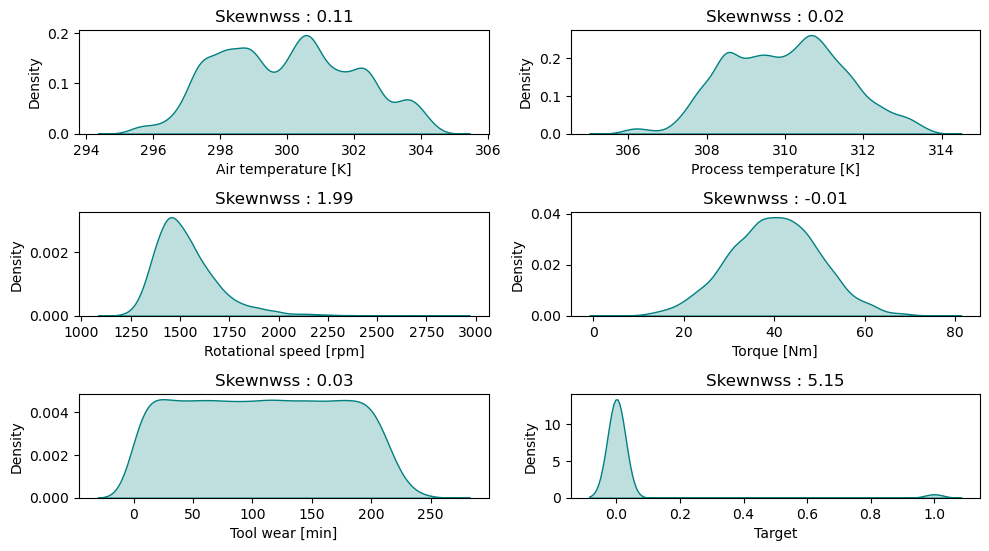

In [26]:
t=1
rows=4
cols=2
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(rows,cols,t)
    plt.title(f'Skewnwss : {round(data[i].skew(),2)}')
    sns.kdeplot(data=data,x=i,fill=True,color='teal')
    t+=1
plt.tight_layout()
plt.show()